In [3]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import nltk
from nltk import word_tokenize, pos_tag

# Sample text
text = "The quick brown fox jumps over the lazy dog."

# Tokenize the text
tokens = word_tokenize(text)

# Perform POS tagging
pos_tags = pos_tag(tokens)

# Output POS tags
print("POS Tags:")
print(pos_tags)

POS Tags:
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


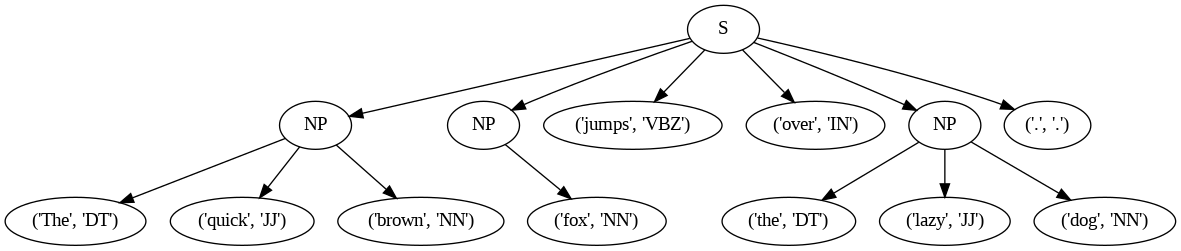

In [11]:
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser
from nltk.tree import Tree
import graphviz
from IPython.display import Image

# Sample text
text = "The quick brown fox jumps over the lazy dog."

# Tokenize the text and perform POS tagging
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

# Define a chunk grammar (e.g., noun phrases)
grammar = "NP: {<DT>?<JJ>*<NN>}"

# Create a chunk parser
chunk_parser = RegexpParser(grammar)

# Parse the tagged words to extract chunks
chunks = chunk_parser.parse(pos_tags)

# Function to convert tree to Graphviz format
def tree_to_dot(tree):
    dot = graphviz.Digraph()
    def add_edges(tree, parent=None):
        if isinstance(tree, Tree):
            dot.node(str(id(tree)), str(tree.label()))
            if parent:
                dot.edge(str(id(parent)), str(id(tree)))
            for child in tree:
                add_edges(child, parent=tree)
        else:
            dot.node(str(id(tree)), str(tree))
            if parent:
                dot.edge(str(id(parent)), str(id(tree)))

    add_edges(tree)
    return dot

# Generate and save the parse tree image
dot = tree_to_dot(chunks)
dot.render('chunked_text_tree', format='png')

# Display the image
Image('chunked_text_tree.png')


In [12]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "The quick brown fox jumps over the lazy dog."

# Apply the language model to the text
doc = nlp(text)

# Output the dependency parsing results
print("Dependency Parsing:")
for token in doc:
    print(f"{token.text} -> {token.dep_} ({token.head.text})")

# Visualize the dependency parse tree
spacy.displacy.render(doc, style="dep")

Dependency Parsing:
The -> det (fox)
quick -> amod (fox)
brown -> amod (fox)
fox -> nsubj (jumps)
jumps -> ROOT (jumps)
over -> prep (jumps)
the -> det (dog)
lazy -> amod (dog)
dog -> pobj (over)
. -> punct (jumps)


CFG-based Parse Tree:


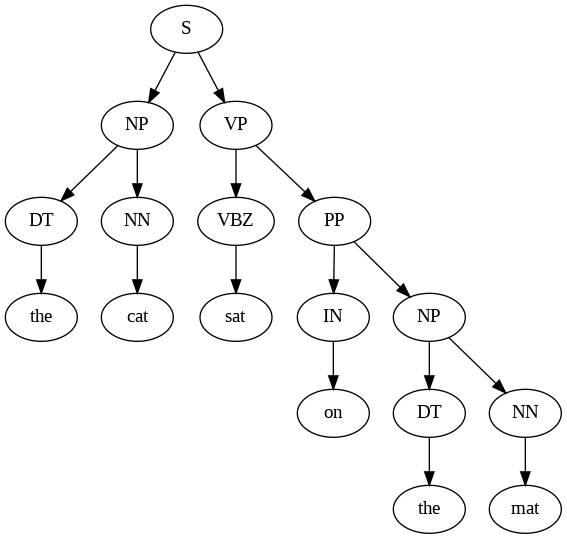

In [17]:
import nltk
from nltk import CFG
from nltk.tree import Tree
from graphviz import Digraph
from IPython.display import display, Image

# Define a simple CFG
grammar = CFG.fromstring("""
    S -> NP VP
    NP -> DT NN
    VP -> VBZ PP
    PP -> IN NP
    DT -> 'the'
    NN -> 'cat' | 'mat'
    VBZ -> 'sat'
    IN -> 'on'
""")

# Create a parser
parser = nltk.ChartParser(grammar)

# Function to convert tree to Graphviz format
def tree_to_dot(tree):
    dot = Digraph()
    def add_edges(tree, parent=None):
        if isinstance(tree, Tree):
            dot.node(str(id(tree)), str(tree.label()))
            if parent:
                dot.edge(str(id(parent)), str(id(tree)))
            for child in tree:
                add_edges(child, parent=tree)
        else:
            dot.node(str(id(tree)), str(tree))
            if parent:
                dot.edge(str(id(parent)), str(id(tree)))

    add_edges(tree)
    return dot

# Sample sentence
sentence = "the cat sat on the mat".split()

# Generate and visualize parse trees
for tree in parser.parse(sentence):
    print("CFG-based Parse Tree:")
    dot = tree_to_dot(tree)

    # Render and display the parse tree
    dot.format = 'png'
    dot.render('/content/cfg_parse_tree')

    # Display the image
    display(Image(filename='/content/cfg_parse_tree.png'))